In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import constrainedzoom as cz
import constrainedzoom.covariance_plot as cv
import functools
import numpy as np
import matplotlib.pyplot as p
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from importlib import reload

1.0


/Users/app/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


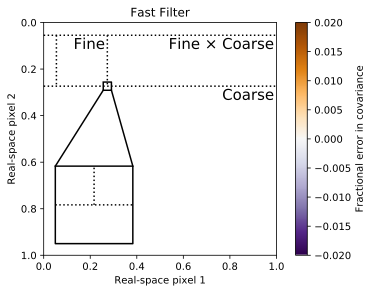

In [3]:
cv.cov_zoom_demo(method=cz.methods.filtered.FilteredZoomConstrained, 
                 errors=True,vmin=-0.02,vmax=0.02,
                 with_constraint=True)

1.0


/Users/app/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


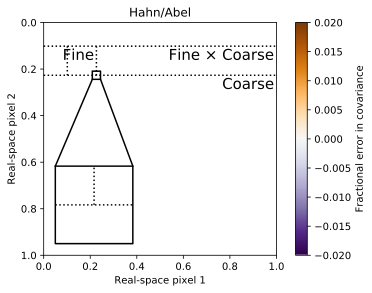

In [4]:
cv.cov_zoom_demo(method=cz.methods.traditional.TraditionalZoomConstrained, 
                 errors=True,vmin=-0.02,vmax=0.02,
                 with_constraint=True)

-0.004806441136420458 0.004806441136420458
Idealized constraint value 3.50 (target 1.00)
Fast Filter constraint value 3.54 (target 1.00)
Hahn/Abel constraint value 4.79 (target 1.00)


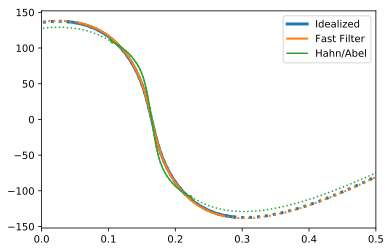

In [6]:
import numpy as np
covec = cz.deriv_constraint_vector(50,256,128)
#covec = cz.constraint_vector(20,256,150)
print(covec.min(),covec.max())
val = 1.0
random = False
n=-1.0
errors=False
potential=True
np.random.seed(5)

if not errors:
    cv.zoom_demo(no_random=not random,constraint_val=val,constraint_covec=covec,
                 method=cz.methods.idealized.IdealizedZoomConstrained,
                 plaw=n,errors=False,linewidth=3,
                 constrain_potential=potential)
cv.zoom_demo(no_random=not random,constraint_val=val,constraint_covec=covec,
             method=cz.methods.filtered.FilteredZoomConstrained,
             plaw=n,errors=errors,linewidth=2,constrain_potential=potential)
cv.zoom_demo(no_random=not random,constraint_val=val,constraint_covec=covec,
             method=cz.methods.traditional.TraditionalZoomConstrained, 
             n2 = 256, plaw=n,errors=errors,constrain_potential=potential)
p.legend()
p.xlim(0.0,0.5)
if errors:
    p.ylim(-0.1,0.1)